<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/PracticaFinalPython_PatriciaMediavilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica final Visualización de datos

## Volumen de ventas de bebidas

### Patricia Mediavilla

  

En esta práctica se van a realizar unas gráficas con el fin de visualizar contenido necesario para poder entender mejor la base de datos.

Para ello vamos a cargar la base de datos y así poder hacer primero un estudio un poco más detallado de la base de datos y de las variables que se utilizan para que la ejecución de la práctica sea más directa.

## Cargar librerías

Para relizar las gráficas debemos cargar las librerías necesarias

In [2]:
pip install plotly_express

In [3]:
import plotly_express as px
import pandas as pd
import matplotlib.pyplot as plt

## Lectura y limpieza de los datos

Lo primero que debemos hacer es importar la base de datos para poder comprenderla y ver la limpieza y los cambios que necesita.

En este caso tenemos una base de datos que nos proporciona los volúmenes de venta de bebidas.

In [4]:
df = pd.read_csv('Datos_practica_final_python.csv', sep=',')
df

,MU,BU,SECTOR,COUNTRY,SUBBRAND,YEAR,PERIOD,SCENARIO,AMOUNT,MONTH,FORECAST_YEAR,FORECAST,UNIT
0,GC Bev,GC Bev,APAC,China,7up (L3),2023,4,AI_forecast,1.957937e+06,3,2022.0,AI_P07F,8 OZ
1,India Bev,India,AMESA,India,Pepsi Regular (L3),2023,9,AI_forecast,9.390326e+06,8,2022.0,AI_P07F,8 OZ
2,India Bev,India,AMESA,India,Pepsi Regular (L3),2022,9,AI_forecast,6.865113e+06,8,2022.0,AI_P08F,8 OZ
3,GC Bev,GC Bev,APAC,China,7up (L3),2024,3,AI_forecast,2.133347e+06,2,2022.0,AI_P12F,8 OZ
4,Mexico,LAB Mexico,LATAM,Mexico,7up Free (L3),2023,6,AI_forecast,3.493313e+06,5,2022.0,AI_P12F,8 OZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40667,GC Bev,GC Bev,APAC,China,Other Csd (L3),2022,12,actual,3.701179e+04,11,NaN,NaN,8 OZ
40668,GC Bev,GC Bev,APAC,China,Other Csd (L3),2021,2,actual,1.904533e+04,1,NaN,NaN,8 OZ
40669,GC Bev,GC Bev,APAC,China,Mountain Dew (L3),2022,13,actual,3.796398e+02,12,NaN,NaN,8 OZ
40670,Colombia,LAB Central,LATAM,Colombia,Gatorade (L3),2023,8,actual,1.730219e+06,7,NaN,NaN,8 OZ


Como hemos explicado se refieren a las ventas de bebidas de una compañia en concreto en diferentes paises.

Las variables que se utilizan son:
- COUNTRY: País al que corresponde el registro.
- MU (Market unit): Grupos de paises (los grupos se llaman market units). La MU tiene
menos granularidad por tanto que el país (dentro de una MU hay varios países).
- BU (Business unit): Grupos de MUs (los grupos se llaman Business units). La BU tiene
menos granularidad por tanto que la MU (dentro de una BU hay varias MU).
- SECTOR: Grupos de Bus. Es el nivel de menos granularidad posible.
- SUBBRAND: Dentro de cada país, encontramos varios “productos” (o marcas).
- YEAR: Año al que pertenece el registro
- PERIOD: Periodo al que pertenece el registro. Es exactamente lo mismo que los meses, pero va de 2 a 13 en lugar de 1 a 12 (el dos pertenece a enero, el 3 a febrero...)
- SCENARIO: Nos indica el tipo de dato que es el registro
- AMOUNT: Valor del registro
- MONTH: Mes al que pertenece el registro (de 1 a 12)
- FORECAST_YEAR: En caso de tratarse el registro de una predicción, año en el que se hizo la predicción
- FORECAST: En caso de tratarse el registro de una predicción, periodo en el que se hizo la predicción
- UNIT: Unidad de volumen en la que esta el registro (siempre 8OZ)

## Pregunta 1

Clasifica cada uno de los campos en uno de los siguientes cuatro grupos:
- Campos que indican información de la granularidad:
  - **COUNTRY**
  - **MU (Market unit)**
  - **BU (Business unit)**
  - **SECTOR**
  - **SUBBRAND**
- Campos que indican información temporal:
  - **YEAR**
  - **PERIOD**
  - **MONTH**
  - **FORECAST_YEAR**
  - **FORECAST**
- Campos que indican información acerca del propio valor del registro:
  - **AMOUNT**
  - **UNIT**
- Campo que nos indique si el registro es un valor real o una predicción:
  - **SCENARIO**

Ordena la tabla para que los
campos de cada grupo estén juntos.


In [11]:
df = df[['COUNTRY', 'MU', 'BU', 'SECTOR', 'SUBBRAND', 'YEAR', 'PERIOD', 'MONTH', 'FORECAST_YEAR', 'FORECAST', 'AMOUNT', 'UNIT', 'SCENARIO']]
df

,COUNTRY,MU,BU,SECTOR,SUBBRAND,YEAR,PERIOD,MONTH,FORECAST_YEAR,FORECAST,AMOUNT,UNIT,SCENARIO
28307,Australia,ANZ Bev,ANZ,APAC,7up (L3),2018,2,1,NaN,NaN,130765.323734,8 OZ,actual
2511,Australia,ANZ Bev,ANZ,APAC,7up (L3),2018,3,2,NaN,NaN,104432.452995,8 OZ,actual
3726,Australia,ANZ Bev,ANZ,APAC,7up (L3),2018,4,3,NaN,NaN,133417.024964,8 OZ,actual
461,Australia,ANZ Bev,ANZ,APAC,7up (L3),2018,5,4,NaN,NaN,127945.129726,8 OZ,actual
25083,Australia,ANZ Bev,ANZ,APAC,7up (L3),2018,6,5,NaN,NaN,133308.242869,8 OZ,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12420,UnitedArabEmirates,Gulf Bev CU,UAE & Gulf F&B,AMESA,Tropicana (L3),2024,4,3,2022.0,AI_P11F,0.000000,8 OZ,AI_forecast
11281,UnitedArabEmirates,Gulf Bev CU,UAE & Gulf F&B,AMESA,Tropicana (L3),2024,4,3,2022.0,AI_P12F,0.000000,8 OZ,AI_forecast
5314,UnitedArabEmirates,Gulf Bev CU,UAE & Gulf F&B,AMESA,Tropicana (L3),2024,5,4,2022.0,AI_P11F,0.000000,8 OZ,AI_forecast
30080,UnitedArabEmirates,Gulf Bev CU,UAE & Gulf F&B,AMESA,Tropicana (L3),2024,5,4,2022.0,AI_P12F,0.000000,8 OZ,AI_forecast


Una vez entendidas las variables y ordenadas de manera que sea más facil la realización de la práctica, vamos a hacer un pequeño procesamiento de los datos para ver si hayq ue hacer alguna modificación o está todo perfecto.

Lo primero que haremos es ver si hay valores faltantes.

In [12]:
df.isnull().sum()

COUNTRY             0
MU                  0
BU                  0
SECTOR              0
SUBBRAND          216
YEAR                0
PERIOD              0
MONTH               0
FORECAST_YEAR    8968
FORECAST         8968
AMOUNT              0
UNIT                0
SCENARIO            0
dtype: int64

Hay algunos valores faltantes pero no nos importan porque por ejemplo refiriendonos a als varibles FORECAST y FORECAST_YEAR, solo están relleno si el valor de SCENARIO es forecast, por lo que estaría bien y en la variable SUBBRAND puede ser aque algunas bebidas no tengan el último grado de granularidad por lo que también se considera correcto.

Ahora estudiaremos si las varibles numéricas están bien o hay algún outlier, como por ejemplo, la variable AMOUNT  si es negativo habría que modificarlo, ya que no podría ser por que el volumen de ventas siempre tiene que ser mayor o igual que 0.

In [14]:
df.describe()

,YEAR,PERIOD,MONTH,FORECAST_YEAR,AMOUNT
count,40672.000000,40672.000000,40672.000000,31704.0,4.067200e+04
mean,2022.219070,7.491345,6.491345,2022.0,2.465570e+06
std,1.319282,3.443474,3.443474,0.0,8.792445e+06
min,2018.000000,2.000000,1.000000,2022.0,0.000000e+00
25%,2022.000000,5.000000,4.000000,2022.0,1.288016e+04
50%,2023.000000,7.000000,6.000000,2022.0,1.544796e+05
75%,2023.000000,10.000000,9.000000,2022.0,1.493294e+06
max,2024.000000,13.000000,12.000000,2022.0,2.271331e+08


Vemos que todos los datos son reales y no hay outliers asi que concluimos que las varibles numéricas son correctas, estudiemos ahora las categóricas.

In [15]:
# Lista de columnas
columnas = ['COUNTRY','MU','BU','SECTOR', 'SUBBRAND', 'FORECAST', 'UNIT', 'SCENARIO']

# Itera a través de las columnas y muestra el conteo de valores únicos
for columna in columnas:
    conteo_valores = df[columna].value_counts()
    print(f'Conteo de valores en la columna "{columna}":')
    print(conteo_valores)
    print('\n')

Conteo de valores en la columna "COUNTRY":
Great Britain         4548
India                 4526
Mexico                4182
UnitedArabEmirates    4087
China                 3928
Spain                 3617
Pakistan              3322
Chile                 3158
South Korea           2754
Australia             2597
Colombia              2243
Sweden                1710
Name: COUNTRY, dtype: int64


Conteo de valores en la columna "MU":
GBI FOBO        4548
India Bev       4526
Mexico          4182
Gulf Bev CU     4087
GC Bev          3928
Spain           3617
Pakistan Bev    3322
Chile           3158
North Asia      2754
ANZ Bev         2597
Colombia        2243
NE FOBO         1710
Name: MU, dtype: int64


Conteo de valores en la columna "BU":
FOBO BU                 6258
LAB Central             5401
India                   4526
LAB Mexico              4182
UAE & Gulf F&B          4087
GC Bev                  3928
SWE                     3617
Pakistan                3322
Asia Beverages & G

Tras entender bien los valores vemos que no hay ningún outlier ni valores extraños.

Por lo que una vez procesados los datos podemos empezar con el trabajo y responder a las preguntas.

## Pregunta 2

Con relación a los valores reales (no predicciones), ¿Cuál es el volumen total de cada
uno de los sectores, cual es el sector con más volumen y cuál es el país con más volumen dentro del sector con más volumen?

<Figure size 1000x600 with 0 Axes>

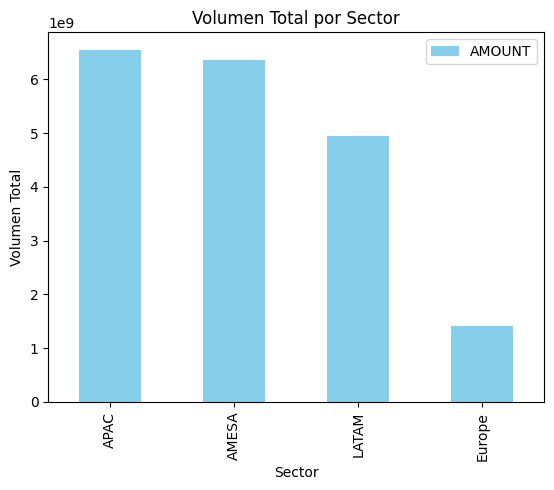

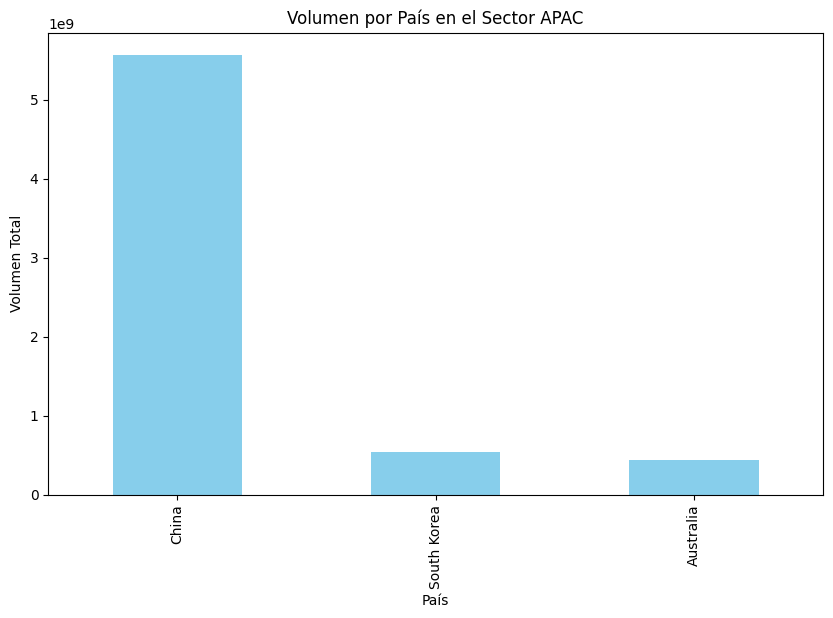

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df

# Filtra los registros que corresponden a valores reales (no predicciones)
real_data = df[df['SCENARIO'] == 'actual']

# Agrupa por sector y suma los volúmenes
sector_volumes = real_data.groupby('SECTOR')['AMOUNT'].sum().reset_index()

# Encuentra el sector con el volumen máximo
max_sector = sector_volumes.loc[sector_volumes['AMOUNT'].idxmax(), 'SECTOR']

# Filtra los registros del sector con más volumen
max_sector_data = real_data[real_data['SECTOR'] == max_sector]

# Agrupa por país y suma los volúmenes dentro del sector con más volumen
country_volumes = max_sector_data.groupby('COUNTRY')['AMOUNT'].sum()

# Configura el índice del DataFrame sector_volumes a la columna 'SECTOR'
sector_volumes = sector_volumes.set_index('SECTOR')

# Ordena el DataFrame sector_volumes de mayor a menor
sector_volumes = sector_volumes.sort_values(by='AMOUNT', ascending=False)

# Gráfico de barras para el volumen total de cada sector
plt.figure(figsize=(10, 6))
sector_volumes.plot(kind='bar', color='skyblue')
plt.title('Volumen Total por Sector')
plt.xlabel('Sector')
plt.ylabel('Volumen Total')
plt.show()

# Ordena country_volumes de mayor a menor
country_volumes = country_volumes.sort_values(ascending=False)

# Gráfico de barras para el volumen por país dentro del sector con más volumen
plt.figure(figsize=(10, 6))
country_volumes.plot(kind='bar', color='skyblue')
plt.title(f'Volumen por País en el Sector {max_sector}')
plt.xlabel('País')
plt.ylabel('Volumen Total')
plt.show()



In [66]:
import pandas as pd
import plotly.express as px

# Supongamos que tu DataFrame se llama df

# Filtra los registros que corresponden a valores reales (no predicciones)
real_data = df[df['SCENARIO'] == 'actual']

# Agrupa por sector y suma los volúmenes
sector_volumes = real_data.groupby('SECTOR')['AMOUNT'].sum().reset_index()

# Encuentra el sector con el volumen máximo
max_sector = sector_volumes.loc[sector_volumes['AMOUNT'].idxmax(), 'SECTOR']

# Filtra los registros del sector con más volumen
max_sector_data = real_data[real_data['SECTOR'] == max_sector]

# Agrupa por país y suma los volúmenes dentro del sector con más volumen
country_volumes = max_sector_data.groupby('COUNTRY')['AMOUNT'].sum()

# Encuentra el país con el volumen máximo dentro del sector con más volumen
max_country_in_max_sector = country_volumes.idxmax()

# Configura el índice del DataFrame sector_volumes a la columna 'SECTOR'
sector_volumes = sector_volumes.set_index('SECTOR')

# Ordena el DataFrame sector_volumes de mayor a menor
sector_volumes = sector_volumes.sort_values(by='AMOUNT', ascending=False)

# Gráfico de barras interactivo con Plotly Express para el volumen total de cada sector
fig_sector = px.bar(sector_volumes, x='AMOUNT', y=sector_volumes.index,
                    text='AMOUNT', title='Volumen Total por Sector',
                    labels={'AMOUNT': 'Volumen'}, color='AMOUNT',
                    color_continuous_scale='blues')

# Ordena country_volumes de mayor a menor
country_volumes = country_volumes.sort_values(ascending=False)

# Gráfico interactivo con Plotly Express para el volumen por país dentro del sector con más volumen
fig_country = px.bar(country_volumes, x=country_volumes.values, y=country_volumes.index,
                     title=f'Volumen por País en el Sector {max_sector}',
                     labels={'AMOUNT': 'Volumen'}, color=country_volumes.values,
                     color_continuous_scale='blues')

# Mostrar las figuras interactivas
fig_sector.show()
fig_country.show()


In [62]:
# Gráfico de pastel interactivo con Plotly Express
fig_pie = px.pie(sector_volumes, values='AMOUNT', names='SECTOR',
                 title=f'Combinaciones con más volumen para {max_sector}')

# Mostrar la figura interactiva
fig_pie.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['AMOUNT'] but received: SECTOR

## Pregunta 3

¿Cuáles son las predicciones hechas para el país con más volumen del sector con más
volumen (el país de la pregunta anterior) en los periodos 2 y 3 del año 2022? Atención:
Hechas en los periodos 2 y 3 significa que se hicieron en ese momento del tiempo,
pero al tener un horizonte de previsión de 18 periodos se habrán hecho para varios
periodos futuros en ese momento. A simple vista, ¿Cuál de las previsiones te parece
mejor, sabiendo ahora los datos reales que hubo posteriormente?

In [67]:
import pandas as pd


# Filtra los registros correspondientes a predicciones para el país y sector en cuestión
predictions = df[(df['SCENARIO'] == 'AI_forecast') & (df['COUNTRY'] == max_country_in_max_sector) & (df['SECTOR'] == max_sector)]

# Filtra las predicciones para los periodos 2 y 3 del año 2022
predictions_2022 = predictions[(predictions['YEAR'] == 2022) & (predictions['PERIOD'].isin([2, 3]))]

# Muestra las predicciones
print(predictions_2022[['COUNTRY', 'SECTOR', 'FORECAST_YEAR', 'FORECAST', 'AMOUNT']])


      COUNTRY SECTOR  FORECAST_YEAR FORECAST        AMOUNT
2215    China   APAC         2022.0    AI_PF  6.901850e+06
18772   China   APAC         2022.0  AI_P02F  2.600515e+06
28463   China   APAC         2022.0    AI_PF  2.055757e+06
30186   China   APAC         2022.0    AI_PF  0.000000e+00
36944   China   APAC         2022.0  AI_P02F  0.000000e+00
796     China   APAC         2022.0    AI_PF  0.000000e+00
2346    China   APAC         2022.0    AI_PF  2.327577e+06
8456    China   APAC         2022.0  AI_P02F  2.816603e+06
26014   China   APAC         2022.0    AI_PF  1.996667e+06
14113   China   APAC         2022.0    AI_PF  8.129161e+05
8270    China   APAC         2022.0  AI_P02F  7.836879e+05
14142   China   APAC         2022.0    AI_PF  8.129161e+05
36404   China   APAC         2022.0    AI_PF  1.133427e+05
4044    China   APAC         2022.0  AI_P02F  5.617984e+04
8869    China   APAC         2022.0    AI_PF  5.185869e+04
22473   China   APAC         2022.0    AI_PF  0.000000e+

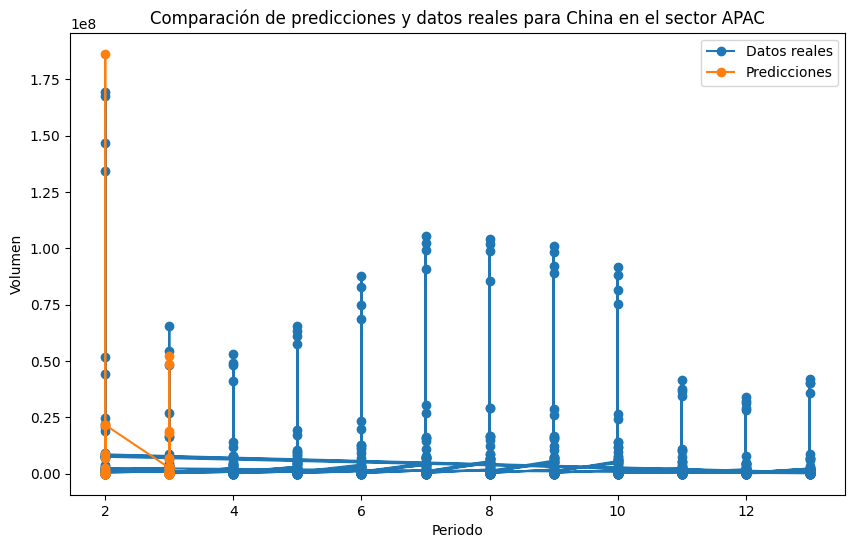

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df

# Filtra los registros correspondientes a predicciones para el país y sector en cuestión
predictions = df[(df['SCENARIO'] == 'AI_forecast') & (df['COUNTRY'] == max_country_in_max_sector) & (df['SECTOR'] == max_sector)]

# Filtra las predicciones para los periodos 2 y 3 del año 2022
predictions_2022 = predictions[(predictions['YEAR'] == 2022) & (predictions['PERIOD'].isin([2, 3]))]

# Ordena las predicciones por año y periodo para asegurar el orden temporal
predictions_2022 = predictions_2022.sort_values(by=['YEAR', 'PERIOD'])

# Filtra los datos reales correspondientes
actual_data = df[(df['SCENARIO'] == 'actual') & (df['COUNTRY'] == max_country_in_max_sector) & (df['SECTOR'] == max_sector)]

# Ordena los datos reales por año y periodo
actual_data = actual_data.sort_values(by=['YEAR', 'PERIOD'])

# Grafica de líneas para visualizar las predicciones y los datos reales
plt.figure(figsize=(10, 6))
plt.plot(actual_data['PERIOD'], actual_data['AMOUNT'], label='Datos reales', marker='o')
plt.plot(predictions_2022['PERIOD'], predictions_2022['AMOUNT'], label='Predicciones', marker='o')
plt.title(f'Comparación de predicciones y datos reales para {max_country_in_max_sector} en el sector {max_sector}')
plt.xlabel('Periodo')
plt.ylabel('Volumen')
plt.legend()
plt.show()


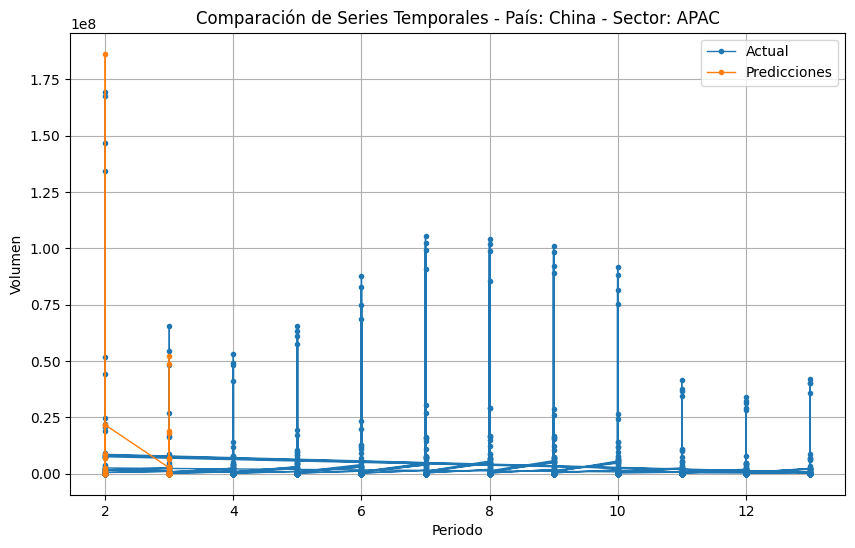

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df

# Filtra los registros correspondientes a predicciones para el país y sector en cuestión
predictions = df[(df['SCENARIO'] == 'AI_forecast') & (df['COUNTRY'] == max_country_in_max_sector) & (df['SECTOR'] == max_sector)]

# Filtra las predicciones para los periodos 2 y 3 del año 2022
predictions_2022 = predictions[(predictions['YEAR'] == 2022) & (predictions['PERIOD'].isin([2, 3]))]

# Ordena las predicciones por año y periodo para asegurar el orden temporal
predictions_2022 = predictions_2022.sort_values(by=['YEAR', 'PERIOD'])

# Filtra los datos reales correspondientes
actual_data = df[(df['SCENARIO'] == 'actual') & (df['COUNTRY'] == max_country_in_max_sector) & (df['SECTOR'] == max_sector)]

# Ordena los datos reales por año y periodo
actual_data = actual_data.sort_values(by=['YEAR', 'PERIOD'])

# Crear un gráfico de series temporales para comparar predicciones y datos reales
plt.figure(figsize=(10, 6))

# Plotear la serie temporal actual
plt.plot(actual_data['PERIOD'], actual_data['AMOUNT'], label="Actual", linestyle='-', marker='.', linewidth=1, alpha=1)

# Plotear la serie temporal de predicciones
plt.plot(predictions_2022['PERIOD'], predictions_2022['AMOUNT'], label="Predicciones", linestyle='-', marker='.', linewidth=1, alpha=1)

# Configuraciones adicionales del gráfico
plt.title(f"Comparación de Series Temporales - País: {max_country_in_max_sector} - Sector: {max_sector}")
plt.xlabel('Periodo')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
